# Project 2 Ana Cabrera

### Introduction
Scientific question: What is the relationship between the SARS-COV-2 spike protein and the Influenza spike protein? 

Background: The two proteins that are being analyzed in this project are the SARS-CoV-2 spike protein and the Hemagglutinin spike of Influenza. The SARS-CoV-2 spike protein is a protein that is composed of two subunits which are S1 and S2. This protein plays a big role in "receptor recognition and cell membrane fusion process"(Yuan Huang, 2020). The S1 has a receptor-binding domain with this domain it is able to bind to the angiotensin. While with the S2 it mediates the viral cell membrane fusion, it is done by making a "six-helical bundle through a "two-heptad repeat domain"(Yuan Huang, 2020). Hemagglutin is the protein that is found in the Influenza Virus. It has antigenic sites that the immune system recognizes, as well as having cleavages sites that are being cleaved by host proteases and also has receptor binding sites in which th sialyl receptors bind to the cell (Nongluk Sriwilaijaroen, 2012).

Hypothesis: If the sequences between the two spike proteins match, then it means that they are a similar virus.

The analysis that was done in this project was pairwise alignment analysis and homology modeling.The data that was used in the pairwise alignment was obtained using uniprot and downloading the sequence needed from the fasta file that was provided. For homology modeling using the blast search we are able to get the sequences of each of the protein in order to place the information in the SWISS-Model workspace and then conduct our homology modeling.

#### https://www.nature.com/articles/s41401-020-0485-4 
#### https://www.ncbi.nlm.nih.gov/pmc/articles/PMC3410141/

### Loaded packages
The packages that were loaded in were pairwise2, numpy, and matplotlib. 
Pairwise2 was imported as it is a package that allows us to identify the alignment with the use of the pairwise method. Numpy was imported in order to be able to use functions to eventually be able to plot and visually see the results. Then matplotlib was loaded in in order to get the visuallization of the plot after conducting the pairwise alignment. 

## Pairwise Alignment

### Background 

Pairwise Alignment is used to identify the parts that are similar in a protein or nucleic acid sequence. It reads each one of the sequences and allows for you to see the specific parts in which the sequences might have some sort of relationship. Whether it be functional, structural or evolutionary pairwise alignment allows us to see the relationship.

https://www.ebi.ac.uk/Tools/psa/

In [24]:
from Bio import pairwise2

In [25]:
from Bio.Seq import Seq

In [26]:
from Bio.pairwise2 import format_alignment

In [27]:
## Create a value for seq1 and seq2 using the fasta files that were ran ahead. 
#local variables
seq1 = Seq("MAIIYLILLF")
seq2 = Seq("MFVFLVLLPL")
## Set up alignments using both of the sequences
alignments = pairwise2.align.globalxx(seq1, seq2)
## This will make each one of the bases of the sequences be compared to see the similarities.
for alignment in alignments:
    print(format_alignment(*alignment))


MAIIY---LI-LLF--
|       |  ||   
M----FVFL-VLL-PL
  Score=4

MAIIY--LI-LLF--
|   .  |  ||   
M---FVFL-VLL-PL
  Score=4

MAIIY--LI-LLF--
|  .   |  ||   
M--F-VFL-VLL-PL
  Score=4

MAIIY--LI-LLF--
| .    |  ||   
M-F--VFL-VLL-PL
  Score=4

MAIIY--LI-LLF--
|.     |  ||   
MF---VFL-VLL-PL
  Score=4

MAII-Y-LI-LLF--
|    . |  ||   
M---FVFL-VLL-PL
  Score=4

MAIIY-LI-LLF--
|  .. |  ||   
M--FVFL-VLL-PL
  Score=4

MAIIY-LI-LLF--
| . . |  ||   
M-F-VFL-VLL-PL
  Score=4

MAIIY-LI-LLF--
|.  . |  ||   
MF--VFL-VLL-PL
  Score=4

MAI-IY-LI-LLF--
|   .  |  ||   
M--FV-FL-VLL-PL
  Score=4

MAIIY-LI-LLF--
| ..  |  ||   
M-FV-FL-VLL-PL
  Score=4

MAIIY-LI-LLF--
|. .  |  ||   
MF-V-FL-VLL-PL
  Score=4

MA-IIY-LI-LLF--
|  .   |  ||   
M-FV--FL-VLL-PL
  Score=4

MAIIY-LI-LLF--
|..   |  ||   
MFV--FL-VLL-PL
  Score=4

M-AIIY-LI-LLF--
| .    |  ||   
MFV---FL-VLL-PL
  Score=4

MAII--YLI-LLF--
|     .|  ||   
M---FVFL-VLL-PL
  Score=4

MAII-YLI-LLF--
|  . .|  ||   
M--FVFL-VLL-PL
  Score=4

MAII-YLI-LLF--


In [28]:
## Import packages necessary to continute doing parwise alignment.
import numpy as np
import matplotlib as plt
import matplotlib.pyplot as pltpy

In [29]:
## Create a function in order to compare the bases of the two sequences that were provided.
def fillMatrix(M) :
    ct = 0
    M[0][0] = " "
    for r in range(1, M.shape[0]):
        for c in range(1, M.shape[1]):
            if M[r][0] == M[0][c]:
                M[r][c] = "*"
                if r == c:
                    ct += 1
            else:
                M[r][c] = " "
    incorr = M.shape[0] - ct - 1
    print("Number of aligned bases:", ct)
    print("Number of unaligned bases:", incorr, "\n")

In [30]:
## Create function for the range of the sequences.
def fill_print():
    D = np.zeros([len(sequence1)+1,len(sequence2)+1], dtype=str)
    for r in range (0, len(sequence1)):
        D[r+1][0] = sequence1[r:r+1]
    for c in range (0, len(sequence2)):
        D[0][c+1] = sequence2[c:c+1]
    fillMatrix(D)
## Set the colors of the plot that are gonna be used in this case black and white. Along with the boundaries that will be used to plot.    
## local variables
    cmap = plt.colors.ListedColormap(['black','white'])
    bounds = [0,0.5,1]
    norm = plt.colors.BoundaryNorm(bounds, cmap.N)
    
    fig , ax = pltpy.subplots(figsize =(10,10), dpi = 70)
    D_red = np.delete(D, 0, axis=1)
    D_red = np.delete (D_red, 0, axis = 0)
    D_red_log = D_red == "*"
    ax.imshow(D_red_log, cmap=cmap, norm=norm)

### Dot Plot
A Dot Plot is used to see where the two proteins that are being analyzed are similar in their sequences and to be able to identify the regions that are similar to each other.

Number of aligned bases: 2
Number of unaligned bases: 8 



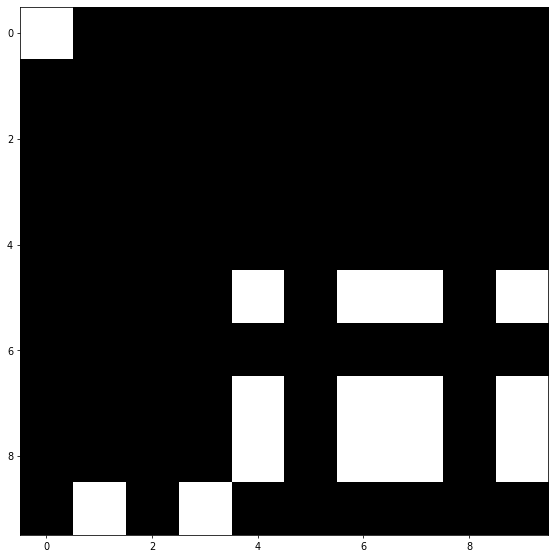

In [31]:
## Select the sequences that will be plotted and print.
##local variables
sequence1 = "MAIIYLILLF"
sequence2 = "MFVFLVLLPL"

fill_print()

## Homology Modeling

### Background 

Homolgy Modeling is used to compare the structures of two proteins. With homology modeling we are able to get the sequence and match it to other sequences for different proteins through the SWISS-model workspace.

https://www.nature.com/articles/nprot.2008.197

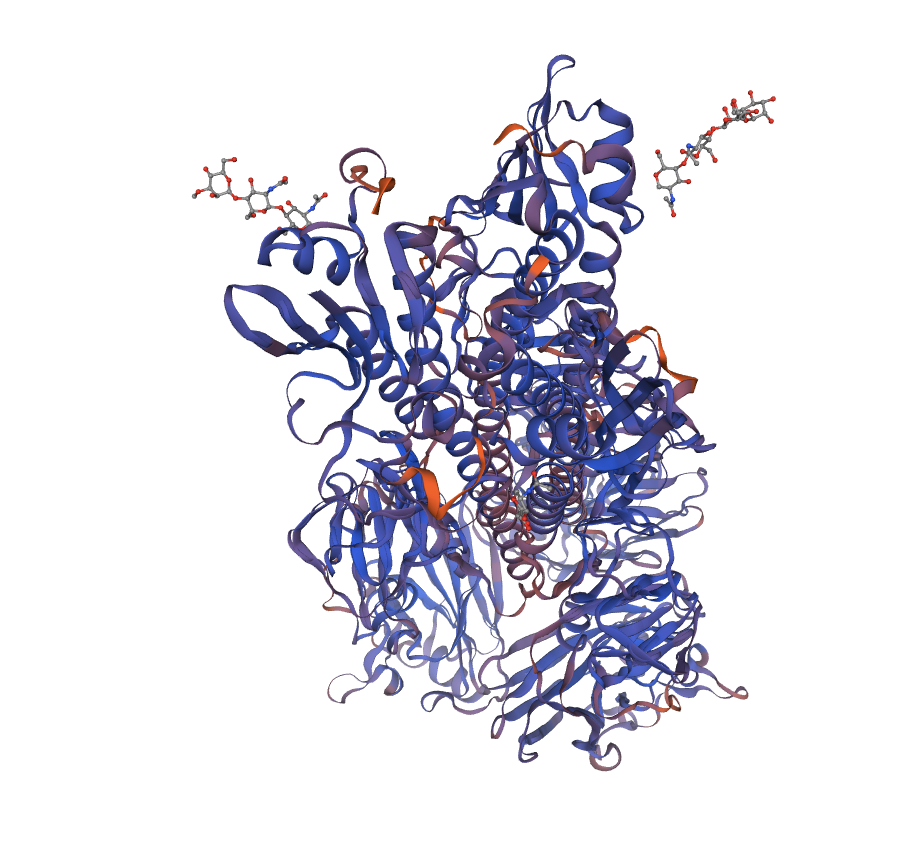

Hemagglutin structure obtained using sequence from BLAST search. 

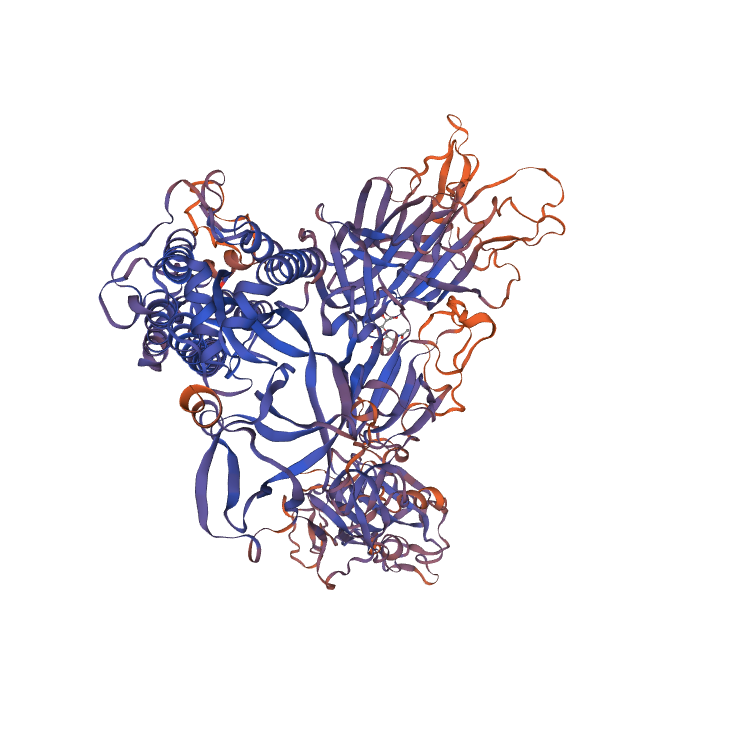

Spike Protein Structure obtained using sequence from BLAST search.

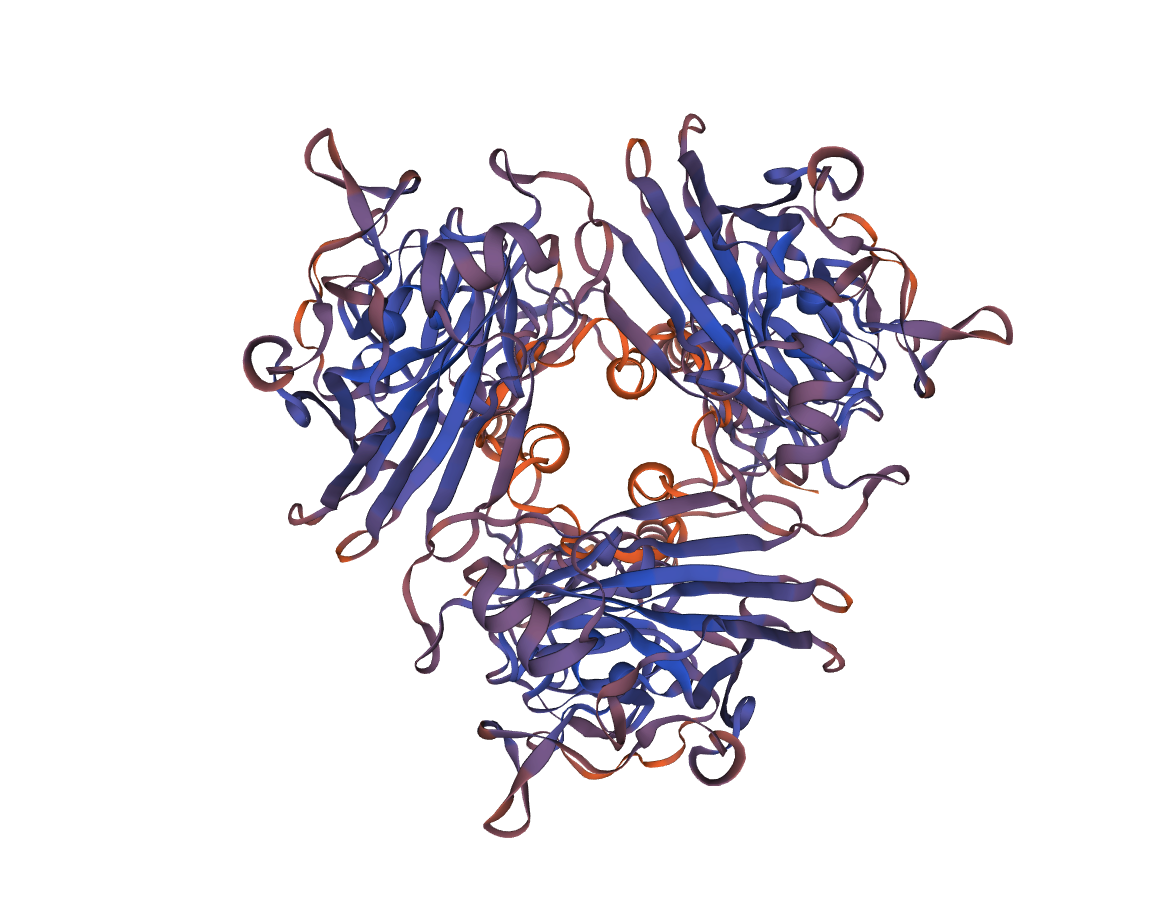

Performing homology modeling on the SWISS-Model workspace with the Spike protein and Hemagglutin this is the structure that we obtain. Along with the following graph between the two proteins.

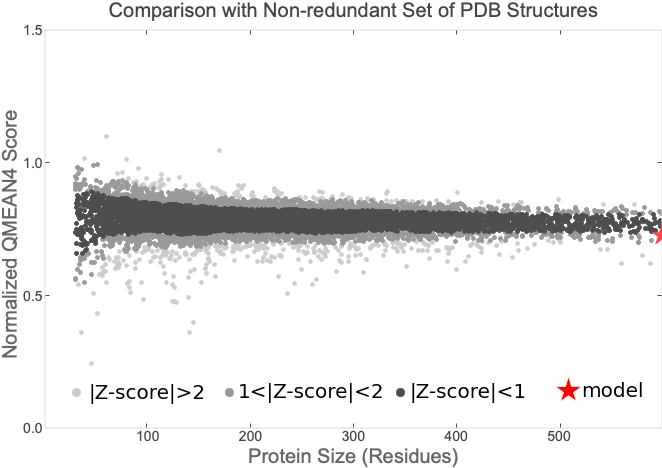

### Ramachandran Plots 
Ramchandran Plots shows the regions that are allowed for the amino acids to be in. This allows for them to be analyzed and state whether the 3D structure that is made would be of good quality or not based on what part of the regions the amino acids are in.

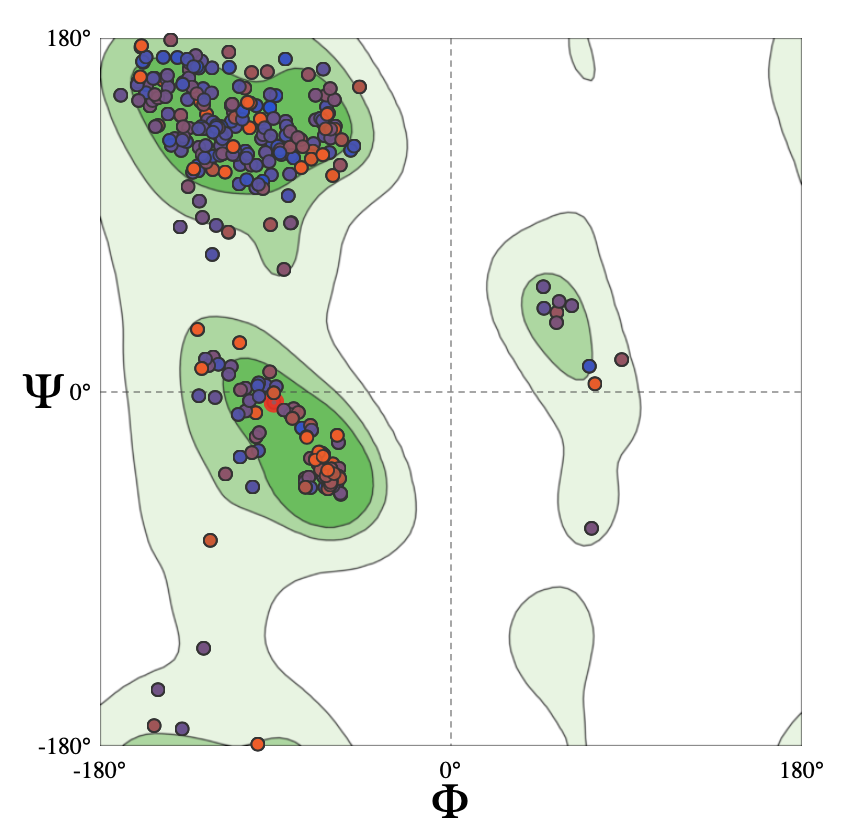

### Analysis
Looking at the plot that we got from the pairwise alignment we are able to see the parts in which the sequences both are similar to each other which then allows us to test out our hypothesis. Although we are able to see that both of these sequences have some similarities it is not enough for us to say that the sequences are the same therefore they are not similar viruses. With the Ramachandran Plot that we obtained through homology modeling we see that there is points that are seen where the conditions are not ideal meaning that this wouldn't work out. This leads us to the conclusion that they are similiar viruses but they are not a match. This means that the hypothesis stating that they are the same was wrong since the two proteins do not match.  